In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from functools import reduce
import matplotlib.pyplot as plt

In [24]:
def get_test_loss(l2):
    data_names = ['SG', "Gauss_CPU", "Gauss_GPU"]
    data_frames = []
    data_frames.append( pd.read_csv('libmf-log/f_0_l2_'+l2+'_k_40_t_500_r_0.1_time_1.csv') )  # SG
    data_frames.append( pd.read_csv('matlab-log/'+'sol_0_gpu_0_l2_'+l2+'_d_40_t_100_eta_0.3_cgt_20_time_1.csv') ) # Gauss CPU
    data_frames.append( pd.read_csv('matlab-log/'+'sol_0_gpu_1_l2_'+l2+'_d_40_t_100_eta_0.3_cgt_20_time_1.csv') )  # Gauss GPU
    
    data_frames[0] = data_frames[0].rename(columns={'va_rmse':'test_loss'})
    for i in range(len(data_frames)):
        data_frames[i] = data_frames[i][["time", "test_loss"]]
        data_frames[i] = data_frames[i].rename(columns = {'test_loss': data_names[i]})
    return reduce(lambda left,right: pd.merge(left,right,on=['time'], how='outer'), data_frames)

def get_obj(l2):
    data_names = ['SG', "Gauss_CPU", "Gauss_GPU"]
    data_frames = []
    data_frames.append( pd.read_csv('libmf-log/f_0_l2_'+l2+'_k_40_t_500_r_0.1_time_1.csv') )  # SG
    data_frames.append( pd.read_csv('matlab-log/'+'sol_0_gpu_0_l2_'+l2+'_d_40_t_100_eta_0.3_cgt_20_time_1.csv') ) # Gauss CPU
    data_frames.append( pd.read_csv('matlab-log/'+'sol_0_gpu_1_l2_'+l2+'_d_40_t_100_eta_0.3_cgt_20_time_1.csv') )  # Gauss GPU

    for i in range(len(data_frames)):
        data_frames[i] = data_frames[i][["time", "obj"]]
        data_frames[i] = data_frames[i].rename(columns = {'obj': data_names[i]})
    return reduce(lambda left,right: pd.merge(left,right,on=['time'], how='outer'), data_frames)

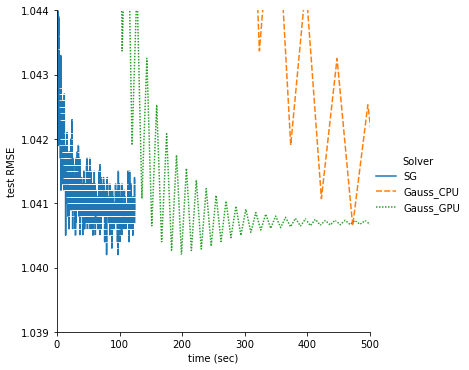

In [25]:
l2 = "5e-1"
data = get_test_loss(l2)
data = data.melt(id_vars="time", var_name="Solver")
g = sns.relplot(x = "time", y="value", hue="Solver", style="Solver", dashes=True, marker=True, kind="line", data=data)
g.ax.set(xlim=(0, 500), ylim=(1.039, 1.044), xlabel="time (sec)", ylabel="test RMSE")
g.savefig("fig/fig8-"+l2+"-RMSE.png")

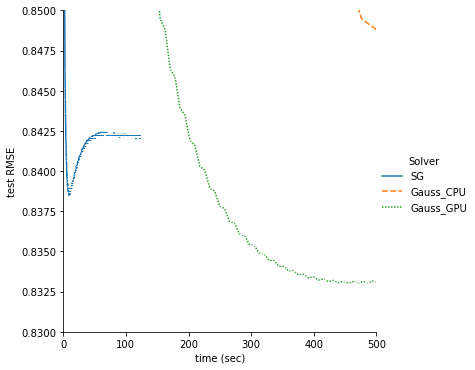

In [45]:
l2 = "5e-2"
data = get_test_loss(l2)
data = data.melt(id_vars="time", var_name="Solver")
g = sns.relplot(x = "time", y="value", hue="Solver", style="Solver", dashes=True, marker=True, kind="line", data=data)
g.ax.set(xlim=(0, 500), ylim=(0.83, 0.85), xlabel="time (sec)", ylabel="test RMSE")
g.savefig("fig/fig8-"+l2+"-RMSE.png")

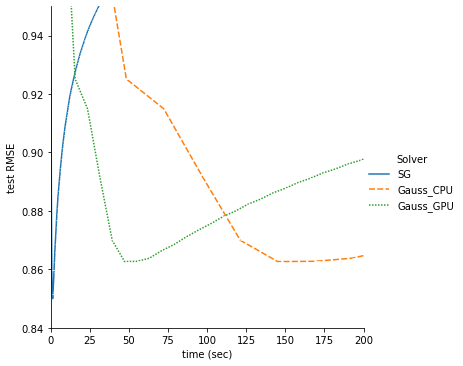

In [35]:
l2 = "5e-3"
data = get_test_loss(l2)
data = data.melt(id_vars="time", var_name="Solver")
g = sns.relplot(x = "time", y="value", hue="Solver", style="Solver", dashes=True, marker=True, kind="line", data=data)
g.ax.set(xlim=(0, 200), ylim=(0.84, 0.95), xlabel="time (sec)", ylabel="test RMSE")
g.savefig("fig/fig8-"+l2+"-RMSE.png")

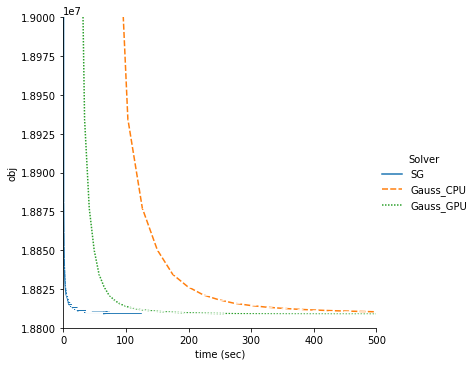

In [40]:
l2 = "5e-1"
data = get_obj(l2)
data = data.melt(id_vars="time", var_name="Solver")
g = sns.relplot(x = "time", y="value", hue="Solver", style="Solver", dashes=True, marker=True, kind="line", data=data)
g.ax.set(xlim=(0, 500), ylim=(1.88e7, 1.9e7), xlabel="time (sec)", ylabel="obj")
g.savefig("fig/fig8-"+l2+"-obj.png")

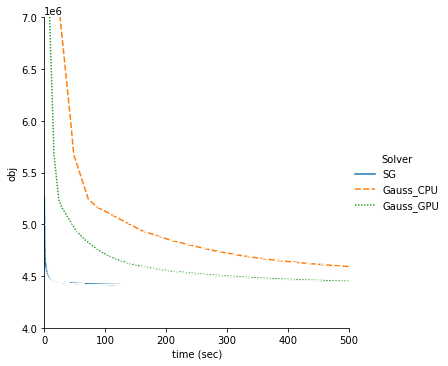

In [44]:
l2 = "5e-2"
data = get_obj(l2)
data = data.melt(id_vars="time", var_name="Solver")
g = sns.relplot(x = "time", y="value", hue="Solver", style="Solver", dashes=True, marker=True, kind="line", data=data)
g.ax.set(xlim=(0, 500), ylim=(4e6, 7e6), xlabel="time (sec)", ylabel="obj")
g.savefig("fig/fig8-"+l2+"-obj.png")

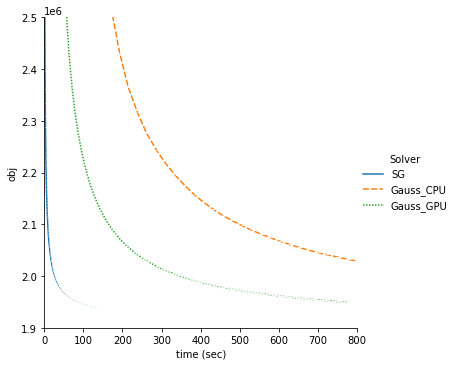

In [52]:
l2 = "5e-3"
data = get_obj(l2)
data = data.melt(id_vars="time", var_name="Solver")
g = sns.relplot(x = "time", y="value", hue="Solver", style="Solver", dashes=True, marker=True, kind="line", data=data)
g.ax.set(xlim=(0, 800), ylim=(1.9e6, 2.5e6), xlabel="time (sec)", ylabel="obj")
g.savefig("fig/fig8-"+l2+"-obj.png")